### === Task ===

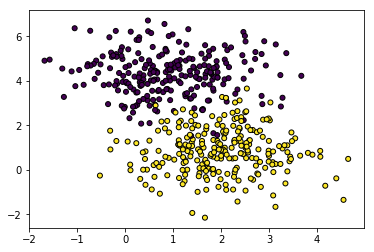

In [7]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

2. Plot training losses as number of iters increases.

3. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.


In [8]:
# feature scaling helps reaching convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [9]:
class LogisticRegression:
    
    def __init__(self, alpha=0.0001, max_iter=20000, loss_old=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.loss_old = loss_old
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        l_rate = 0.01
        self.losses = []
        
        #10% of data
        # minibatch
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0]) #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            loss, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
                self.losses.append(loss)
            self.w = self.w - self.alpha * grad            

    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return loss, grad

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        

Loss at iteration 0 24.26015131959808
Loss at iteration 500 16.29847672217408
Loss at iteration 1000 12.950549793290438
Loss at iteration 1500 9.338633780146067
Loss at iteration 2000 9.56408738936573
Loss at iteration 2500 11.22458457490757
Loss at iteration 3000 5.320376894316876
Loss at iteration 3500 7.2296495573481625
Loss at iteration 4000 5.465686921685329
Loss at iteration 4500 7.638001062293273
Loss at iteration 5000 4.8670007619916795
Loss at iteration 5500 7.420663262448469
Loss at iteration 6000 5.412089562794531
Loss at iteration 6500 6.596561250062073
Loss at iteration 7000 4.04457804929983
Loss at iteration 7500 4.437431944881796
Loss at iteration 8000 3.4729646808438845
Loss at iteration 8500 3.335277657008366
Loss at iteration 9000 4.127872897937937
Loss at iteration 9500 5.312074549480396
Loss at iteration 10000 5.299299393426639
Loss at iteration 10500 4.68415456812674
Loss at iteration 11000 6.658127752467432
Loss at iteration 11500 1.5180812377093522
Loss at iterat

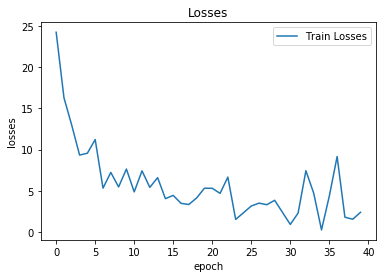

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
model.plot()

In [11]:
class classification_reports():
    
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
        
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN)/ float( self.TP + self.TN + self.FN + self.FP)
        return self.acc
    
    def recall(self):
        self.recall = (100* self.TP)/ float(self.TP + self.FN)
        return self.recall
        
    def precision(self):
        self.precision = 100* (self.TP)/ float(self.TP + self.FP)
        return self.precision
        
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1


In [12]:
# From scratch
report = classification_reports(y_test, yhat)
print(f"Accuracy: {report.accuracy()}")
print(f"Recall: {report.recall()}")
print(f"Precision: {report.precision()}")
print(f"F1: {report.f1()}")

# sklearn way
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, yhat))

Accuracy: 96.0
Recall: 94.66666666666667
Precision: 97.26027397260275
F1: 95.94594594594595
Report:               precision    recall  f1-score   support

          0       0.95      0.97      0.96        75
          1       0.97      0.95      0.96        75

avg / total       0.96      0.96      0.96       150

